<font size=7> Histology  Images

A good place to start with analyzing the data is through looking at histology images of them. We can overlay the electrodes and neurons from the datasets in order to better understand functional relationships between different anatomical regions.


In [22]:
import pickle 
from human_hip.histology import plot_histology
from human_hip.basics import read_phy_files

# ?Anterior? CA1

A close up image of the hippocampal slice is show below. This is the region that we made recordings from. To see a more zoomed our region of the slice as well as a description of the anatomy, check out [these powerpoint slides](https://docs.google.com/presentation/d/1XnDf52a2a3WxhANidxyvfVMTUnctHEaE). These other [powerpoint slides](https://docs.google.com/presentation/d/1WILZM5OEJAKGT23LvyLisr76K_dXrSpNgYgtq2xPrfM/edit?usp=sharing) depict how the histology was alligned to the MEA in order to create the neural overlays shown in later sections.

In [14]:
#  Load Data
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb' )
sd = pickle.load(file)
file.close()

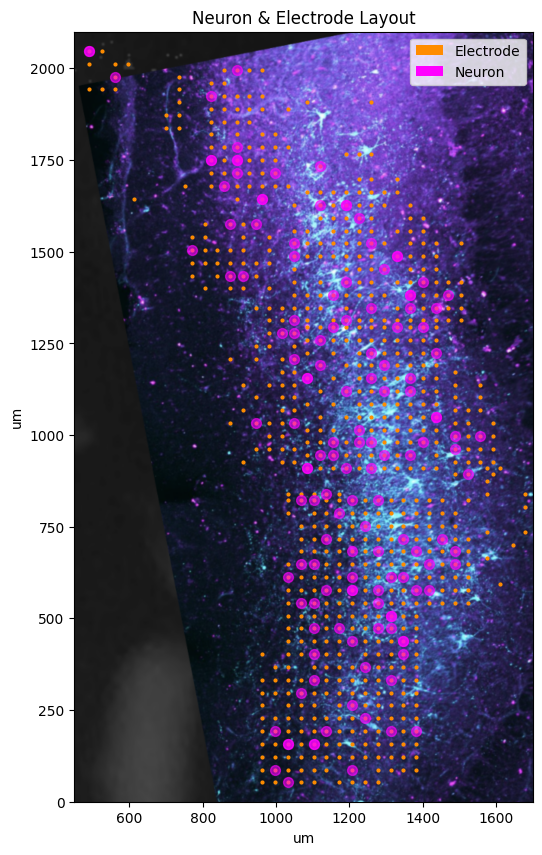

In [15]:
plot_histology(sd, "/workspaces/human_hippocampus/data/histology/ca1_anterior.png", xlim=(450,1700), ylim=(0,2100) )

# ?Posterior? CA1

<font color="orange"> 

This is my **best guess** as to what the histology looks like

In [8]:
#  Load Data
file = open('/workspaces/human_hippocampus/data/ephys/2023-05-10-e-hc52_18790_unperturbed/sd_ca1p_curated.pkl', 'rb' )
sd = pickle.load(file)
file.close()

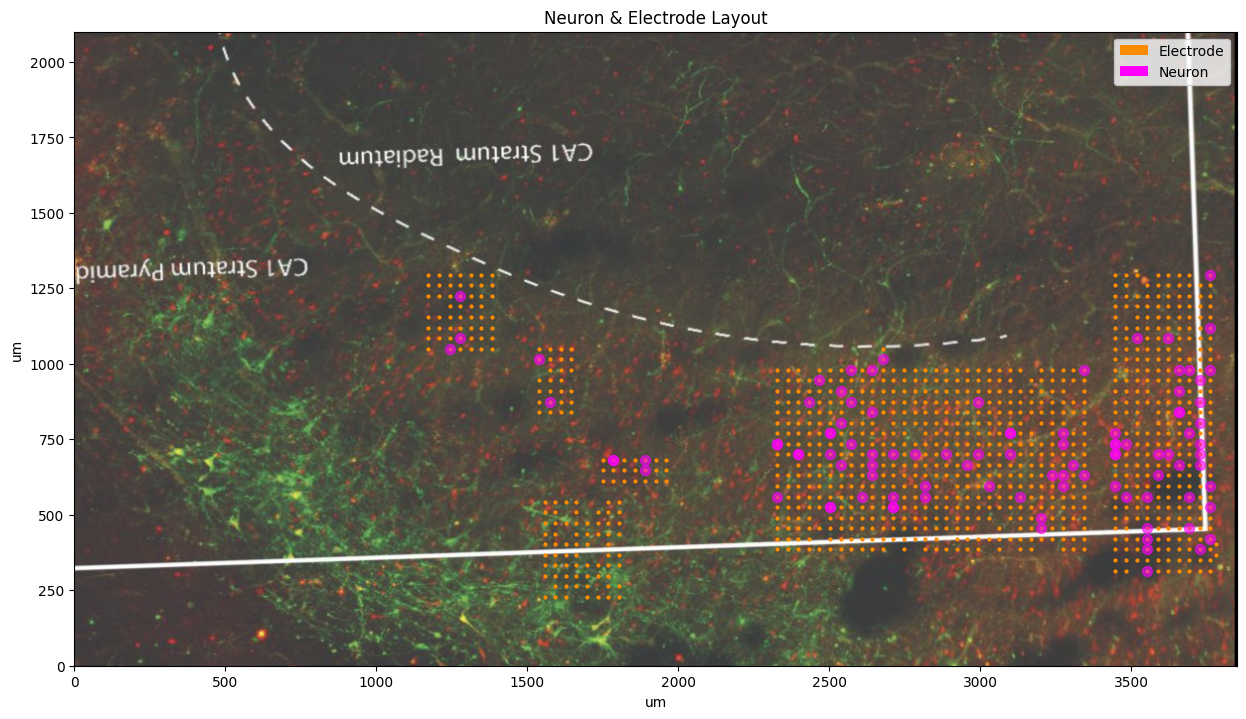

In [9]:
plot_histology(sd, "/workspaces/human_hippocampus/data/histology/ca1_posterior.png" )

## <font color="brown"> John Andrews- First Guess

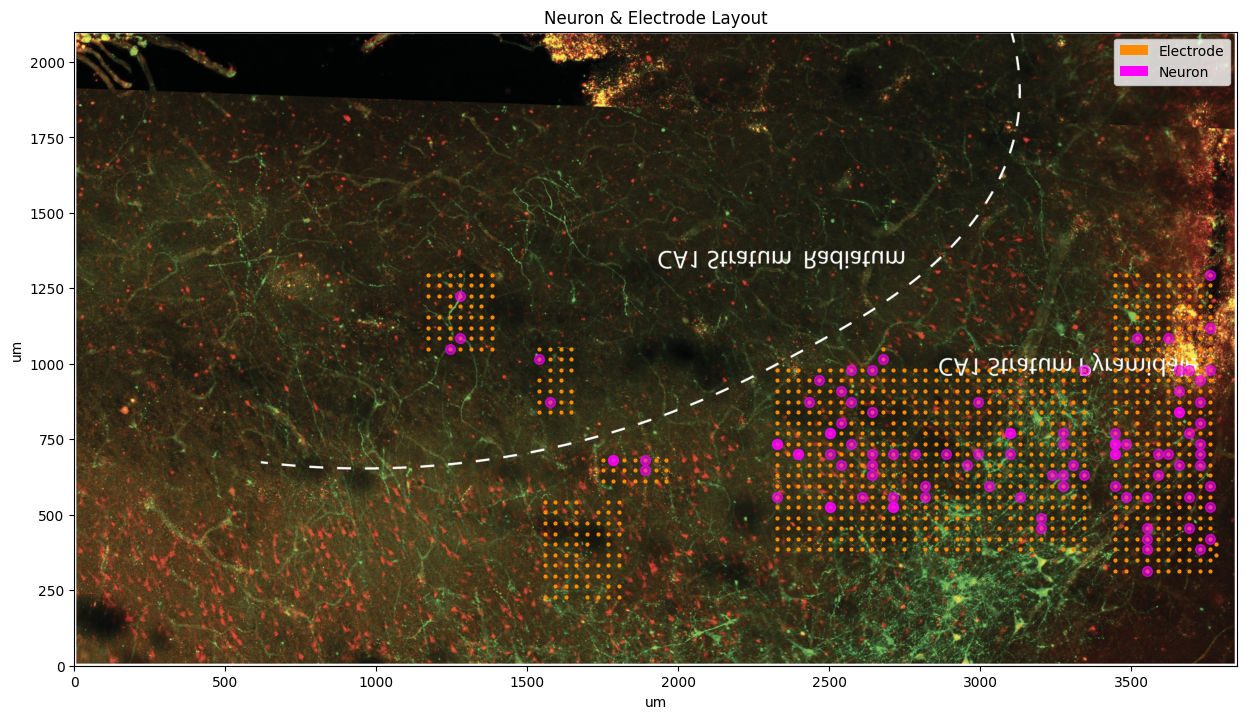

In [9]:
plot_histology(sd, "/workspaces/human_hippocampus/data/histology/old_ca1_posterior.jpg")

# Adult Dentate Gyrus

An image can be of the dentate gyrus slice can be found in [these slides](https://docs.google.com/presentation/d/1WILZM5OEJAKGT23LvyLisr76K_dXrSpNgYgtq2xPrfM/edit#slide=id.p).

<font color="red"> The image still needs to be lined up to be useful!

In [12]:
sd = read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-11-02-e-Hc11.1-chip16753/derived/kilosort2/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_curated.zip" )

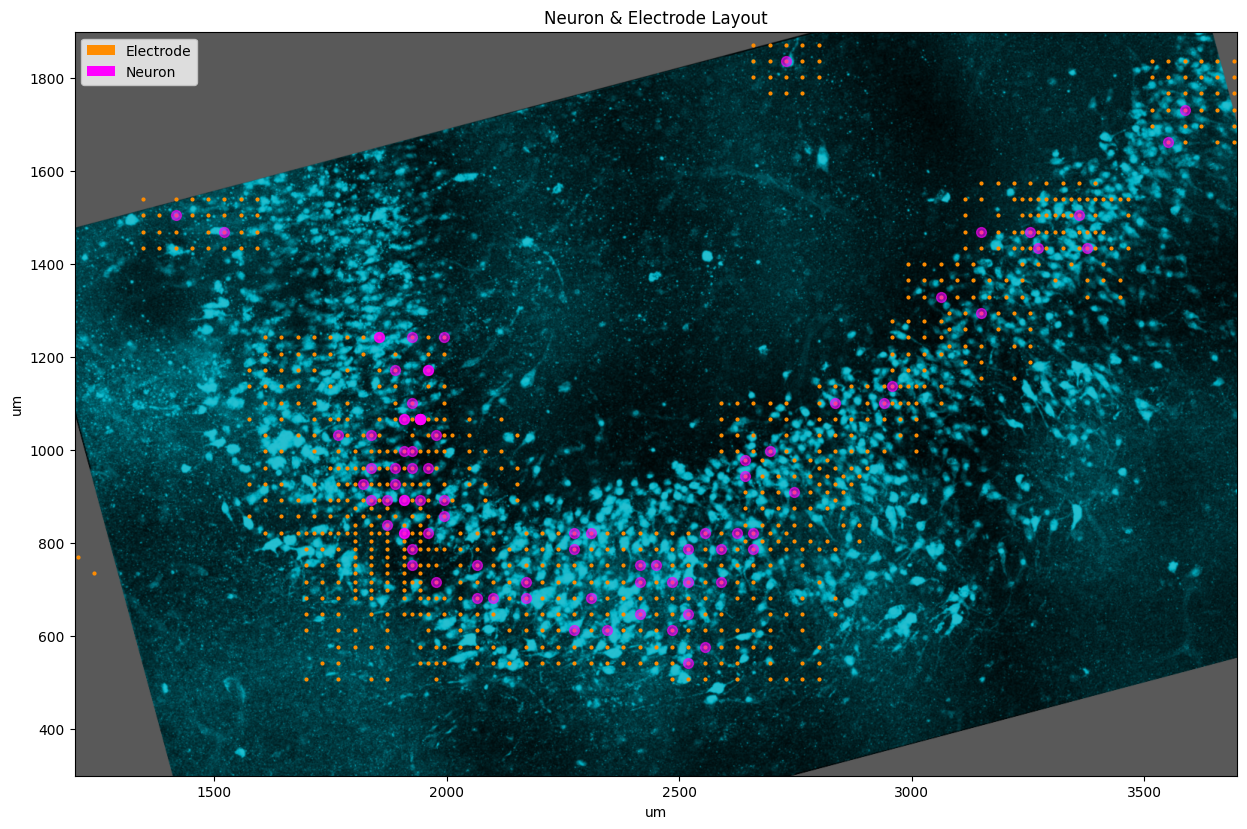

In [13]:
plot_histology(sd, "/workspaces/human_hippocampus/data/histology/dg_adult.png", xlim=(1200,3700), ylim=(300,1900) )

# Infant Dentate Gyrus

<font color="red">I don't yet have a histology image of the infant slice.

In [24]:
sd = read_phy_files( "/workspaces/human_hippocampus/data/ephys/2022-10-20-e-/derived/kilosort2/hc9.19_chp-16849_plated-10.19.22_rec10.19.22_curated.zip")

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

/tmp/ipykernel_9629/2605178292.py:11: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for key,val in sd.neuron_data[0].items():


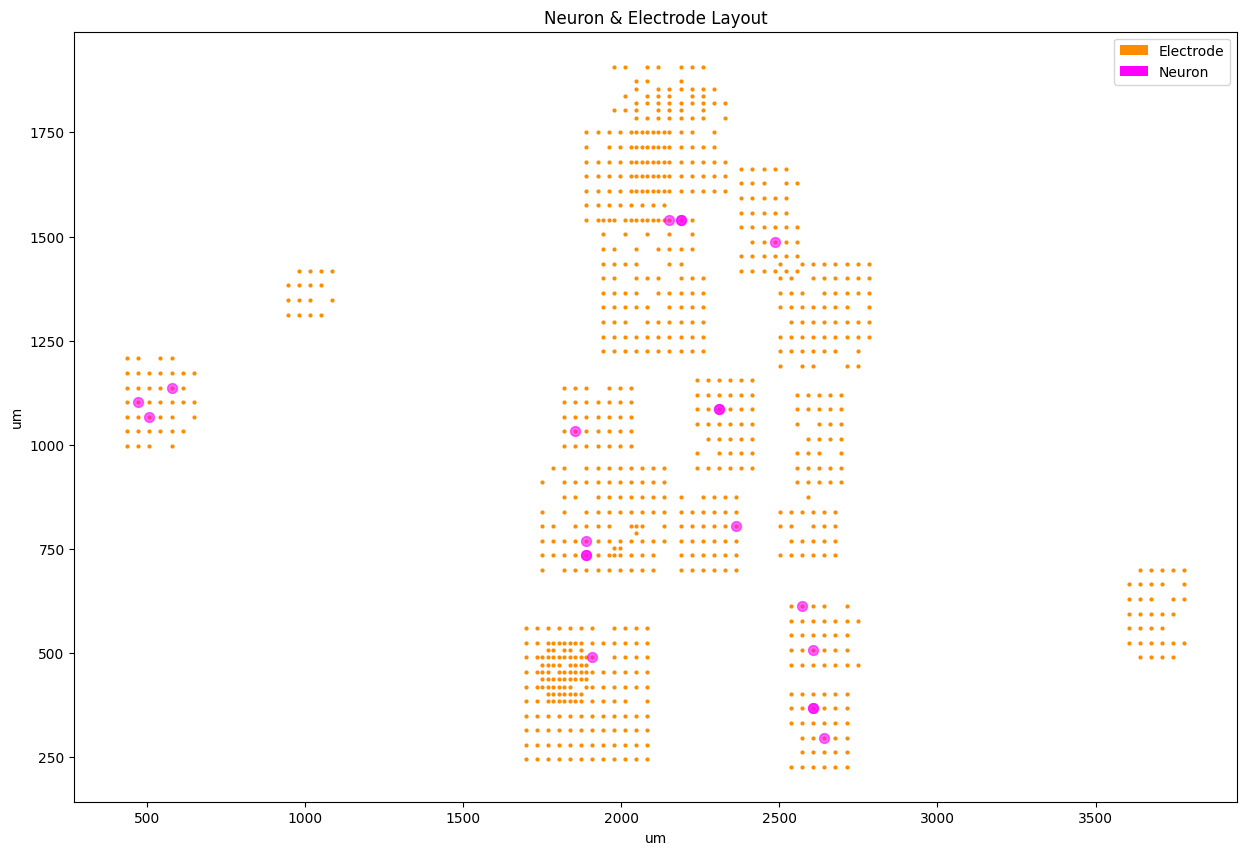

In [26]:
# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA

# Plot electrodes
electrode_mapping = pd.DataFrame.from_dict( sd.metadata[0], orient="index", columns=['x','y']  ) 
plt.scatter( electrode_mapping.x.values, electrode_mapping.y.values, s=4, c='darkorange')

# plot neurons
neuron_x = []
neuron_y = []
for key,val in sd.neuron_data[0].items():
    neuron_x.append( val["position"][0] )
    neuron_y.append( val["position"][1] )
plt.scatter( neuron_x, neuron_y,  c='magenta', alpha=.6, s=50 )  

#add legend, axises limits, labels,  and title
legend_elements = [Patch(facecolor="darkorange"), Patch(facecolor="magenta") ]   # Create colors in legend
plt.legend(legend_elements, ["Electrode","Neuron"])       # Add legend
plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
plt.show()  
